In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

from tqdm import tqdm
from collections import Counter
from plotly.offline import iplot
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'
pd.options.display.max_columns = 9999

In [2]:
import matplotlib as mpl
fp = mpl.font_manager.FontProperties(family='JasmineUPC',size=20)

In [3]:
df = pd.read_csv('./data/data.csv')
features = df.columns[2:]

In [4]:
AIS_df = df[df.organization == 'AIS']
DTAC_df = df[df.organization == 'DTAC']

In [5]:
DTAC_df[features] = DTAC_df[features].applymap(lambda x: x*1000000)
AIS_df[features] = AIS_df[features].applymap(lambda x: x*1000)

/Users/nutorbit/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [6]:
DTAC_df.head(2)
AIS_df.head(2)

,organization,year,เงินสดและรายการเทียบเท่าเงินสด,เงินฝากธนาคาร,เงินลงทุน,ลูกหนี้การค้า,สินค้าคงเหลือ,สินทรัพย์หมุนเวียน,สินทรัพย์ไม่หมุนเวียน,เงินกู้ยืมระยะสั้น,เงินกู้ยืมระยะยาว,หนี้,ส่วนของเจ้าของ,กำไร,รายได้,ต้นทุน,สินทรัพย์หมุนเวียนทั้งหมด,สินทรัพย์ไม่หมุนเวียนทั้งหมด,หนี้สินหมุนเวียนทั้งหมด,หนี้สินไม่หมุนเวียนทั้งหมด
12,DTAC,2554,2.187300e+10,400000.0,457000000.0,6.575000e+09,384000000.0,2.192000e+09,7.238400e+10,1.320000e+09,1.268000e+09,6.646900e+10,3.480900e+10,1.181200e+10,7.919890e+10,6.253600e+10,3.112540e+10,7.274110e+10,6.485010e+10,4.206970e+09
13,DTAC,2555,4.554000e+09,400000.0,495000000.0,8.385000e+09,904000000.0,2.974000e+09,8.372800e+10,8.808000e+09,1.946000e+10,3.793000e+10,3.484400e+10,1.128200e+10,8.949740e+10,7.433410e+10,1.696920e+10,8.407390e+10,3.780000e+10,2.839830e+10


,organization,year,เงินสดและรายการเทียบเท่าเงินสด,เงินฝากธนาคาร,เงินลงทุน,ลูกหนี้การค้า,สินค้าคงเหลือ,สินทรัพย์หมุนเวียน,สินทรัพย์ไม่หมุนเวียน,เงินกู้ยืมระยะสั้น,เงินกู้ยืมระยะยาว,หนี้,ส่วนของเจ้าของ,กำไร,รายได้,ต้นทุน,สินทรัพย์หมุนเวียนทั้งหมด,สินทรัพย์ไม่หมุนเวียนทั้งหมด,หนี้สินหมุนเวียนทั้งหมด,หนี้สินไม่หมุนเวียนทั้งหมด
0,AIS,2549,1.274220e+10,0.000000e+00,118187000.0,5.364710e+09,2.055470e+09,2.612310e+09,1.114080e+11,8.030440e+09,2.550430e+10,2.316700e+10,7.759900e+10,1.625600e+10,9.142820e+10,5.595560e+10,2.289290e+10,1.114080e+11,3.103870e+10,2.566310e+10
1,AIS,2550,6.822080e+09,1.494580e+09,216204000.0,8.191720e+09,1.236250e+09,2.717540e+09,1.082630e+11,5.398070e+09,2.492920e+10,2.315360e+10,7.546080e+10,1.624200e+10,1.084540e+11,7.075660e+10,2.058560e+10,1.083560e+11,2.815660e+10,2.532430e+10


In [8]:
x = pd.DataFrame()

In [9]:
x.append([DTAC_df, AIS_df]).to_csv('./data/combine.csv', index=False)

In [10]:
DTAC_df.to_csv('./data/DTAC.csv', index=False)
AIS_df.to_csv('./data/AIS.csv', index=False)

In [13]:
def plot(feature):
    data = [
        go.Scatter(x=DTAC_df.year, y=DTAC_df[feature], name='DTAC'),
        go.Scatter(x=AIS_df.year, y=AIS_df[feature], name='AIS')
    ]
    
    layout = go.Layout(title=feature)
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
plt.rcParams['font.family'] = 'RSU'
plt.rcParams['xtick.labelsize'] = 10.0
plt.rcParams['ytick.labelsize'] = 10.0

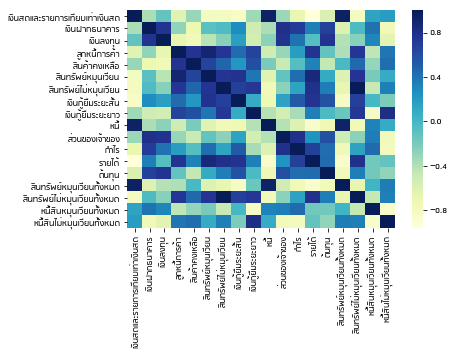

In [17]:
sns.heatmap(DTAC_df[features].corr(), cmap="YlGnBu")

In [16]:
import ta

In [26]:
for feature in features:
    AIS_df['ema_{}'.format(feature)] = ta.ema(AIS_df[feature], n=2)
    DTAC_df['ema_{}'.format(feature)] = ta.ema(DTAC_df[feature], n=2)

/Users/nutorbit/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/nutorbit/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [27]:
AIS_df.head()

,oganization,year,เงินสดและรายการเทียบเท่าเงินสด,เงินฝากธนาคาร,เงินลงทุน,ลูกหนี้การค้า,สินค้าคงเหลือ,สินทรัพย์หมุนเวียน,สินทรัพย์ไม่หมุนเวียน,เงินกู้ยืมระยะสั้น,เงินกู้ยืมระยะยาว,หนี้,ส่วนของเจ้าของ,กำไร,ema_เงินสดและรายการเทียบเท่าเงินสด,ema_เงินฝากธนาคาร,ema_เงินลงทุน,ema_ลูกหนี้การค้า,ema_สินค้าคงเหลือ,ema_สินทรัพย์หมุนเวียน,ema_สินทรัพย์ไม่หมุนเวียน,ema_เงินกู้ยืมระยะสั้น,ema_เงินกู้ยืมระยะยาว,ema_หนี้,ema_ส่วนของเจ้าของ,ema_กำไร
0,AIS,2549,1.274220e+10,0.000000e+00,1.181870e+08,5.364710e+09,2.055470e+09,2.612310e+09,1.114080e+11,8.030440e+09,2.550430e+10,2.316700e+10,7.759900e+10,1.625600e+10,1.274220e+10,0.000000e+00,1.181870e+08,5.364710e+09,2.055470e+09,2.612310e+09,1.114080e+11,8.030440e+09,2.550430e+10,2.316700e+10,7.759900e+10,1.625600e+10
1,AIS,2550,6.822080e+09,1.494580e+09,2.162040e+08,8.191720e+09,1.236250e+09,2.717540e+09,1.082630e+11,5.398070e+09,2.492920e+10,2.315360e+10,7.546080e+10,1.624200e+10,9.190128e+09,8.967480e+08,1.769972e+08,7.060916e+09,1.563938e+09,2.675448e+09,1.095210e+11,6.451018e+09,2.515924e+10,2.315896e+10,7.631608e+10,1.624760e+10
2,AIS,2551,1.500930e+10,1.315260e+09,2.954870e+08,8.515710e+09,1.592500e+09,2.806770e+09,9.854630e+10,7.524020e+09,2.977440e+10,1.734720e+10,7.343560e+10,1.646450e+10,1.194658e+10,1.094991e+09,2.331239e+08,7.750029e+09,1.577467e+09,2.737653e+09,1.043225e+11,6.959282e+09,2.734537e+10,2.040602e+10,7.495164e+10,1.635034e+10
3,AIS,2552,2.426120e+10,9.059210e+08,3.303800e+09,8.668200e+09,7.872510e+08,4.552000e+06,8.673040e+10,4.974400e+08,3.662040e+10,1.573240e+10,7.181100e+10,1.678910e+10,1.706188e+10,1.016454e+09,1.508636e+09,8.131423e+09,1.249224e+09,1.602365e+09,9.701499e+10,4.275132e+09,3.119807e+10,1.846467e+10,7.364707e+10,1.653260e+10
4,AIS,2553,1.045140e+10,2.166360e+09,4.325720e+09,9.142510e+09,1.126830e+09,6.797800e+07,7.006700e+10,1.588270e+10,2.047760e+10,1.979640e+10,4.119110e+10,2.063280e+10,1.452421e+10,1.457887e+09,2.590076e+09,8.519565e+09,1.202238e+09,1.013335e+09,8.667003e+10,8.731118e+09,2.708263e+10,1.897590e+10,6.118767e+10,1.810661e+10


In [32]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
def plot_ema(feature):
    scale = MinMaxScaler()
    data = [
        go.Scatter(x=DTAC_df.year, y=DTAC_df[feature], name='DTAC'),
        go.Scatter(x=DTAC_df.year, y=DTAC_df['ema_'+feature], name='DTAC_ema'),
        go.Scatter(x=AIS_df.year, y=AIS_df[feature], name='AIS'),
        go.Scatter(x=AIS_df.year, y=AIS_df['ema_'+feature], name='AIS_ema'),
    ]
    
    layout = go.Layout(title=feature)
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [51]:
for feature in features:
    scale = MinMaxScaler()
    AIS_df['scale_{}'.format(feature)] = scale.fit_transform(AIS_df[feature].values.reshape(-1, 1))
    DTAC_df['scale_{}'.format(feature)] = scale.fit_transform(DTAC_df[feature].values.reshape(-1, 1))

/Users/nutorbit/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/nutorbit/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [52]:
DTAC_df.head()

,oganization,year,เงินสดและรายการเทียบเท่าเงินสด,เงินฝากธนาคาร,เงินลงทุน,ลูกหนี้การค้า,สินค้าคงเหลือ,สินทรัพย์หมุนเวียน,สินทรัพย์ไม่หมุนเวียน,เงินกู้ยืมระยะสั้น,เงินกู้ยืมระยะยาว,หนี้,ส่วนของเจ้าของ,กำไร,ema_เงินสดและรายการเทียบเท่าเงินสด,ema_เงินฝากธนาคาร,ema_เงินลงทุน,ema_ลูกหนี้การค้า,ema_สินค้าคงเหลือ,ema_สินทรัพย์หมุนเวียน,ema_สินทรัพย์ไม่หมุนเวียน,ema_เงินกู้ยืมระยะสั้น,ema_เงินกู้ยืมระยะยาว,ema_หนี้,ema_ส่วนของเจ้าของ,ema_กำไร,scale_เงินสดและรายการเทียบเท่าเงินสด,scale_เงินฝากธนาคาร,scale_เงินลงทุน,scale_ลูกหนี้การค้า,scale_สินค้าคงเหลือ,scale_สินทรัพย์หมุนเวียน,scale_สินทรัพย์ไม่หมุนเวียน,scale_เงินกู้ยืมระยะสั้น,scale_เงินกู้ยืมระยะยาว,scale_หนี้,scale_ส่วนของเจ้าของ,scale_กำไร
12,DTAC,2554,2.187300e+10,400000.0,457000000.0,6.575000e+09,3.840000e+08,2.192000e+09,7.238400e+10,1.320000e+09,1.268000e+09,6.646900e+10,3.480900e+10,1.181200e+10,2.187300e+10,400000.000000,4.570000e+08,6.575000e+09,3.840000e+08,2.192000e+09,7.238400e+10,1.320000e+09,1.268000e+09,6.646900e+10,3.480900e+10,1.181200e+10,0.805775,1.000000,0.801991,0.000000,0.000000,0.000000,0.000000,0.130696,0.000000,0.957020,0.995454,0.822543
13,DTAC,2555,4.554000e+09,400000.0,495000000.0,8.385000e+09,9.040000e+08,2.974000e+09,8.372800e+10,8.808000e+09,1.946000e+10,3.793000e+10,3.484400e+10,1.128200e+10,1.148160e+10,400000.000000,4.798000e+08,7.661000e+09,6.960000e+08,2.661200e+09,7.919040e+10,5.812800e+09,1.218320e+10,4.934560e+10,3.483000e+10,1.149400e+10,0.000000,1.000000,1.000000,0.441356,0.148268,0.553370,0.938995,0.880621,0.655993,0.000000,1.000000,0.776552
14,DTAC,2556,5.472000e+09,400000.0,324000000.0,1.067600e+10,1.683000e+09,3.598000e+09,8.362400e+10,6.295920e+09,1.816440e+10,4.787350e+10,3.272000e+10,1.385700e+10,8.634947e+09,400000.000000,4.060000e+08,9.089158e+09,1.163526e+09,3.104947e+09,8.129053e+10,6.041646e+09,1.501640e+10,4.864829e+10,3.383053e+10,1.261332e+10,0.042710,1.000000,0.108957,1.000000,0.370385,0.994933,0.930387,0.629036,0.609274,0.333443,0.724113,1.000000
15,DTAC,2557,5.823200e+09,200000.0,309380000.0,1.045380e+10,3.891160e+09,3.546640e+09,8.240170e+10,5.664400e+09,2.300000e+10,4.516330e+10,3.259840e+10,1.327460e+10,7.466991e+09,316923.076923,3.658655e+08,9.656009e+09,2.296543e+09,3.288420e+09,8.175209e+10,5.884944e+09,1.833266e+10,4.720068e+10,3.331872e+10,1.288800e+10,0.059050,0.230769,0.032776,0.945818,1.000000,0.958589,0.829211,0.565789,0.783643,0.242560,0.708318,0.949462
16,DTAC,2558,1.012050e+10,200000.0,305040000.0,9.722450e+09,2.825770e+09,3.605160e+09,8.446500e+10,1.000000e+10,1.800000e+10,5.582060e+10,2.722360e+10,7.444760e+09,8.485636e+09,272037.914692,3.425155e+08,9.681515e+09,2.499706e+09,3.410012e+09,8.279354e+10,7.464657e+09,1.820496e+10,5.050975e+10,3.097889e+10,1.079842e+10,0.258984,0.230769,0.010161,0.767484,0.696224,1.000000,1.000000,1.000000,0.603346,0.599939,0.010183,0.443571


In [53]:
def plot_scale(feature):
    scale = MinMaxScaler()
    data = [
        go.Scatter(x=DTAC_df.year, y=DTAC_df['scale_'+feature], name='DTAC'),
        go.Scatter(x=AIS_df.year, y=AIS_df['scale_'+feature], name='AIS'),
    ]
    
    layout = go.Layout(title=feature)
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [55]:
# for feature in features:
#     plot_scale(feature)

In [57]:
for feature in features:
    AIS_df['log_{}'.format(feature)] = np.log1p(AIS_df[feature])
    DTAC_df['log_{}'.format(feature)] = np.log1p(DTAC_df[feature])

/Users/nutorbit/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/nutorbit/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [58]:
AIS_df.head()

,oganization,year,เงินสดและรายการเทียบเท่าเงินสด,เงินฝากธนาคาร,เงินลงทุน,ลูกหนี้การค้า,สินค้าคงเหลือ,สินทรัพย์หมุนเวียน,สินทรัพย์ไม่หมุนเวียน,เงินกู้ยืมระยะสั้น,เงินกู้ยืมระยะยาว,หนี้,ส่วนของเจ้าของ,กำไร,ema_เงินสดและรายการเทียบเท่าเงินสด,ema_เงินฝากธนาคาร,ema_เงินลงทุน,ema_ลูกหนี้การค้า,ema_สินค้าคงเหลือ,ema_สินทรัพย์หมุนเวียน,ema_สินทรัพย์ไม่หมุนเวียน,ema_เงินกู้ยืมระยะสั้น,ema_เงินกู้ยืมระยะยาว,ema_หนี้,ema_ส่วนของเจ้าของ,ema_กำไร,scale_เงินสดและรายการเทียบเท่าเงินสด,scale_เงินฝากธนาคาร,scale_เงินลงทุน,scale_ลูกหนี้การค้า,scale_สินค้าคงเหลือ,scale_สินทรัพย์หมุนเวียน,scale_สินทรัพย์ไม่หมุนเวียน,scale_เงินกู้ยืมระยะสั้น,scale_เงินกู้ยืมระยะยาว,scale_หนี้,scale_ส่วนของเจ้าของ,scale_กำไร,log_เงินสดและรายการเทียบเท่าเงินสด,log_เงินฝากธนาคาร,log_เงินลงทุน,log_ลูกหนี้การค้า,log_สินค้าคงเหลือ,log_สินทรัพย์หมุนเวียน,log_สินทรัพย์ไม่หมุนเวียน,log_เงินกู้ยืมระยะสั้น,log_เงินกู้ยืมระยะยาว,log_หนี้,log_ส่วนของเจ้าของ,log_กำไร
0,AIS,2549,1.274220e+10,0.000000e+00,1.181870e+08,5.364710e+09,2.055470e+09,2.612310e+09,1.114080e+11,8.030440e+09,2.550430e+10,2.316700e+10,7.759900e+10,1.625600e+10,1.274220e+10,0.000000e+00,1.181870e+08,5.364710e+09,2.055470e+09,2.612310e+09,1.114080e+11,8.030440e+09,2.550430e+10,2.316700e+10,7.759900e+10,1.625600e+10,0.339474,0.000000,0.004705,0.243298,0.296868,0.930605,0.296489,0.489624,0.154357,0.062860,1.000000,0.000611,23.268185,0.000000,18.587779,22.403108,21.443770,21.683501,25.436465,22.806505,23.962113,23.865995,25.074820,23.511728
1,AIS,2550,6.822080e+09,1.494580e+09,2.162040e+08,8.191720e+09,1.236250e+09,2.717540e+09,1.082630e+11,5.398070e+09,2.492920e+10,2.315360e+10,7.546080e+10,1.624200e+10,9.190128e+09,8.967480e+08,1.769972e+08,7.060916e+09,1.563938e+09,2.675448e+09,1.095210e+11,6.451018e+09,2.515924e+10,2.315896e+10,7.631608e+10,1.624760e+10,0.000000,0.336066,0.027891,0.426038,0.105103,0.968157,0.280418,0.318528,0.147838,0.062747,0.947235,0.000000,22.643430,21.125111,19.191733,22.826390,20.935348,21.722993,25.407829,22.409307,23.939306,23.865416,25.046879,23.510866
2,AIS,2551,1.500930e+10,1.315260e+09,2.954870e+08,8.515710e+09,1.592500e+09,2.806770e+09,9.854630e+10,7.524020e+09,2.977440e+10,1.734720e+10,7.343560e+10,1.646450e+10,1.194658e+10,1.094991e+09,2.331239e+08,7.750029e+09,1.577467e+09,2.737653e+09,1.043225e+11,6.959282e+09,2.734537e+10,2.040602e+10,7.495164e+10,1.635034e+10,0.469474,0.295745,0.046646,0.446981,0.188495,1.000000,0.230764,0.456709,0.202763,0.013653,0.897258,0.009711,23.431936,20.997300,19.504135,22.865179,21.188571,21.755300,25.313792,22.741366,24.116915,23.576697,25.019675,23.524472
3,AIS,2552,2.426120e+10,9.059210e+08,3.303800e+09,8.668200e+09,7.872510e+08,4.552000e+06,8.673040e+10,4.974400e+08,3.662040e+10,1.573240e+10,7.181100e+10,1.678910e+10,1.706188e+10,1.016454e+09,1.508636e+09,8.131423e+09,1.249224e+09,1.602365e+09,9.701499e+10,4.275132e+09,3.119807e+10,1.846467e+10,7.364707e+10,1.653260e+10,1.000000,0.203702,0.758264,0.456838,0.000000,0.000000,0.170384,0.000000,0.280370,0.000000,0.857166,0.023877,23.912144,20.624463,21.918339,22.882927,20.484058,15.331077,25.186070,20.024986,24.323871,23.478988,24.997304,23.543996
4,AIS,2553,1.045140e+10,2.166360e+09,4.325720e+09,9.142510e+09,1.126830e+09,6.797800e+07,7.006700e+10,1.588270e+10,2.047760e+10,1.979640e+10,4.119110e+10,2.063280e+10,1.452421e+10,1.457887e+09,2.590076e+09,8.519565e+09,1.202238e+09,1.013335e+09,8.667003e+10,8.731118e+09,2.708263e+10,1.897590e+10,6.118767e+10,1.810661e+10,0.208114,0.487120,1.000000,0.487498,0.079489,0.022634,0.085232,1.000000,0.097374,0.034362,0.101543,0.191630,23.070002,21.496314,22.187844,22.936201,20.842674,18.034695,24.972718,23.488496,23.742597,23.708766,24.441488,23.750148


In [65]:
def plot_log(feature):
    scale = MinMaxScaler()
    data = [
        go.Scatter(x=DTAC_df.year, y=DTAC_df['log_'+feature], name='DTAC'),
        go.Scatter(x=AIS_df.year, y=AIS_df['log_'+feature], name='AIS'),
    ]
    
    layout = go.Layout(title=feature)
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [1]:
# for feature in features:
#     plot_log(feature)


In [8]:
columns = ['organization', 'มูลค่าหลักทรัพย์', 'รายได้รวม ปี2014', 'รายได้รวม ปี2015', 'รายได้รวมปี 2016', 'รายได้เฉลี่ย/เลขหมาย/เดือน ปี2014', 'รายได้เฉลี่ย/เลขหมาย/เดือน ปี2015', 'รายได้เฉลี่ย/เลขหมาย/เดือน ปี2016', 'จำนวนลูกค้า ปี2014' ,'จำนวนลูกค้า ปี2015', 'จำนวนลูกค้า ปี2016', 'อัตราการเปลี่ยนแปลงรายได้รวมปี 2015', 'อัตราการเปลี่ยนแปลงรายได้รวมปี 2016', 'อัตราการเปลี่ยนแปลงจำนวนลูกค้าปี 2015', 'อัตราการเปลี่ยนแปลงจำนวนลูกค้าปี 2016']


In [9]:
df = pd.DataFrame(columns=columns)

In [10]:
data = [
    ['AIS', 496507, 150029, 156015, 152718, 216, 254, 251, 44.3, 38.5, 41, 4, -2.1, -13.1, 6.5],
    ['DTAC', 103000, 90868, 88054, 90868, 202, 204, 216, 28, 25.3, 24.5, -3.1, -6, -9.6, -3.2],
    ['TRUE', 208551, 117660, 122949, 131158, 130, 171, 217, 23.6, 19.1, 24.5, 4.5, 6.7, -19.1, 28.3]
]

In [11]:
x = []
for e in data:
    dct = dict(zip(columns, e))
    x.append(dct)

In [12]:
pd.DataFrame(x).to_csv('./data/summarize.csv', index=False)